In [1]:
paths = [
    "fedavg/mnist/mnist_client_stats.pkl",
    "fedavgm/mnist/mnist_client_stats.pkl",
    "fedprox/mnist/mnist_client_stats.pkl",
    "moon/mnist/mnist_client_stats.pkl",
    "scaffold/mnist/mnist_client_stats.pkl",
    "loop/mnist/mnist_client_stats.pkl",
]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dict_list = [pd.read_pickle(path) for path in paths]
print("num_algo:", len(dict_list))
print("num_clients:", len(dict_list[0]))
print("num_rounds:", len(dict_list[1][0]))
print("num_time:", len(dict_list[0][0][1]))
print("after:", len(dict_list[0][0][1]["after"]))
print(dict_list[5][0][1]["before"])
print("train", dict_list[0][0][1]["after"]["train"])
print("test client 0", dict_list[0][0])


num_algo: 6
num_clients: 25
num_rounds: 6
num_time: 2
after: 3
{'train': {'loss': 0, 'correct': 0, 'size': 1.0}, 'val': {'loss': 0, 'correct': 0, 'size': 1.0}, 'test': {'loss': 349.32680612802505, 'correct': 808, 'size': 883.0}}
train {'loss': 0, 'correct': 0, 'size': 1.0}
test client 0 {1: {'before': {'train': {'loss': 0, 'correct': 0, 'size': 1.0}, 'val': {'loss': 0, 'correct': 0, 'size': 1.0}, 'test': {'loss': 148782.40966796875, 'correct': 50, 'size': 883.0}}, 'after': {'train': {'loss': 0, 'correct': 0, 'size': 1.0}, 'val': {'loss': 0, 'correct': 0, 'size': 1.0}, 'test': {'loss': 506.4593391418457, 'correct': 780, 'size': 883.0}}}, 8: {'before': {'train': {'loss': 0, 'correct': 0, 'size': 1.0}, 'val': {'loss': 0, 'correct': 0, 'size': 1.0}, 'test': {'loss': 1150.2135601043701, 'correct': 406, 'size': 883.0}}, 'after': {'train': {'loss': 0, 'correct': 0, 'size': 1.0}, 'val': {'loss': 0, 'correct': 0, 'size': 1.0}, 'test': {'loss': 128.60979580879211, 'correct': 848, 'size': 883.0}}

In [ ]:
for clients in range(25):
    for algo_type, i in enumerate(dict_list):
        name, _, _ = paths[algo_type].split("/")
        before_train_loss = []
        after_train_loss = []
        before_train_correct = []
        after_train_correct = []
        count = 0
        for key, epoch_value in dict_list[algo_type][clients].items():
            if count==6: break
            before_train_loss.append(epoch_value["before"]["test"]["loss"])
            after_train_loss.append(epoch_value["after"]["test"]["loss"])
            before_train_correct.append(epoch_value["before"]["test"]["correct"])
            after_train_correct.append(epoch_value["after"]["test"]["correct"])
            # count += 1
        epochs = range(1, len(before_train_loss)+1)
        # print(after_train_correct)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(epochs, before_train_loss, label="before")
        ax.plot(epochs, after_train_loss, label="after")
        ax.legend()
        fig.suptitle(f"Client {clients} {name} loss")
        fig.savefig(f"{name}/mnist/client_{clients}_{name}_loss.png")
        

[148782.40966796875, 1150.2135601043701, 569.6938257217407, 366.94243812561035, 570.1948008537292, 106.19789743423462]
[540955.55078125, 20816.33905029297, 1918.9679069519043, 322.87840473651886, 1664.8061932325363, 105.55915462970734]
[119217.3837890625, 1164.801555633545, 638.3929605484009, 474.57013607025146, 484.8683042526245, 126.37287306785583]
[148782.40234375, 1301.0726375579834, 697.8499479293823, 467.9635124206543, 2791.179431915283, 501.5612545013428]
[11232.647094726562, 1999.9858093261719, 1990.092945098877, 1988.3743515014648, 1901.4013900756836, 1880.3463554382324]
[41758.58557128906, 349.32680612802505, 75.24454680457711, 49.82930054143071, 29.3573030596599, 41.330571132246405, 25.482954050414264, 30.57580116786994]


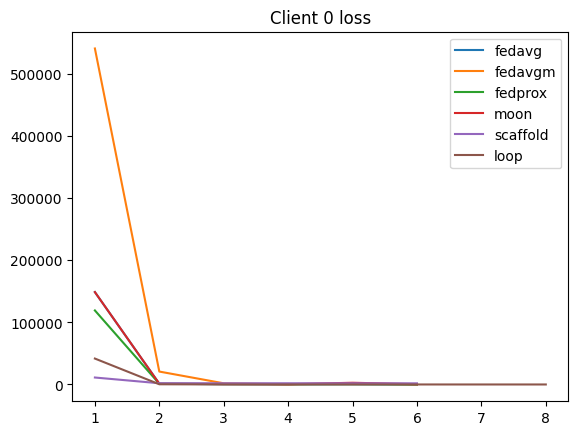

In [4]:
for algo_type, i in enumerate(dict_list):
    name, _, _ = paths[algo_type].split("/")
    before_train_loss = []
    before_train_correct = []
    count = 0
    for key, epoch_value in dict_list[algo_type][0].items():
        if count==6: break
        before_train_loss.append(epoch_value["before"]["test"]["loss"])
        before_train_correct.append(epoch_value["before"]["test"]["correct"])
        # count += 1
    epochs = range(1, len(before_train_loss)+1)
    print(before_train_loss)
    plt.plot(epochs, before_train_loss, label=name)
    plt.legend()
plt.title("Client 0 loss")
plt.savefig(f"client_0_loss.png")

In [ ]:
for clients in range(25):
    for algo_type, i in enumerate(dict_list):
        name, _, _ = paths[algo_type].split("/")
        before_train_correct = []
        after_train_correct = []
        count = 0
        for key, epoch_value in dict_list[algo_type][clients].items():
            if count==6: break
            before_train_correct.append(epoch_value["before"]["test"]["correct"])
            after_train_correct.append(epoch_value["after"]["test"]["correct"])
            count += 1
        epochs = range(1, len(before_train_correct)+1)
        # print(after_train_correct)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(epochs, before_train_correct, label="before")
        ax.plot(epochs, after_train_correct, label="after")
        ax.legend()
        fig.suptitle(f"Client {clients} {name} correct")
        fig.savefig(f"{name}/mnist/client_{clients}_{name}_correct.png")
        

[50, 406, 758, 767, 695, 855]
[50, 253, 451, 813, 789, 855]
[50, 405, 767, 756, 710, 847]
[50, 406, 742, 769, 418, 693]
[51, 177, 246, 275, 215, 216]
[50, 808, 858, 862, 872, 868, 874, 869]


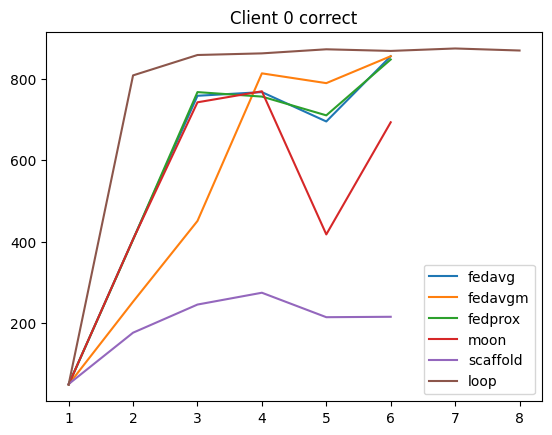

In [5]:
for algo_type, i in enumerate(dict_list):
    name, _, _ = paths[algo_type].split("/")
    before_train_correct = []
    count = 0
    for key, epoch_value in dict_list[algo_type][0].items():
        if count==6: break
        before_train_correct.append(epoch_value["before"]["test"]["correct"])
        # count += 1
    epochs = range(1, len(before_train_correct)+1)
    print(before_train_correct)
    plt.plot(epochs, before_train_correct, label=name)
    plt.legend()
plt.title("Client 0 correct")
plt.savefig(f"client_0_correct.png")